consider the equation $$ {\partial a \over \partial t} = {\bar a - a \over \tau }$$
 
move $a/\tau$ to LHS, multiply by integrating factor $e^{(t/\tau)}$ to give
 
$$ {\partial  \over \partial t}(a e^{t/\tau}) = {\bar a \over \tau }e^{t/\tau}$$
 
integrate from $t_0$ to $t_1$
$$(a(t_1) e^{t_1/\tau}) - (a(t_0) e^{t_0/\tau}) = {\bar a}(e^{t_1/\tau} -  e^{t_0/\tau})$$
  
multiply by $e^{-t_0/\tau}$
  
$$a(t_1) e^{(t_1-t_0)/\tau} - a(t_0) = {\bar a}(e^{(t_1-t_0)/\tau} -  1)$$
   
Let $t_1-t_0 = \Delta t$, then
$$a(t_1) - a(t_0)e^{-\Delta t/\tau} = {\bar a}(1 - e^{-\Delta t/\tau})$$

or

$$a(t_1) - a(t_0)  = (\bar a - a(t_0))(1 - e^{-\Delta t/\tau})$$
observve that if $\Delta t = 0$ then $a(t_1) = a(t_0)$ and otherwise the increment for changing $a(t_0)$ is just controlled by the e-folding time $\tau$.

Dividing by $\Delta t$ to form a "tendency" gives
$${a(t_1) - a(t_0) \over \Delta t} = {\bar a - a(t_0) \over \Delta t}(1 - e^{-\Delta t/\tau})$$



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# the conversion factor from KK(2000) to Wood 2005
# wood 2005 uses equations in density
# kk 2000 uses equations in mixing ratio
print 1350*1.e-6**(-1.79) 
print 1.22**(-1.47)

7.41880179708e+13
0.746536504479


Kbe in Wood and KK units 1.6e+13 48319.2275264
8.10349348773e-09 8.10349348773e-09
diff in calculation [ -2.04154076e-16   2.75731029e-16   0.00000000e+00   0.00000000e+00
   3.33121440e-16   2.17928580e-16  -3.01539426e-16   2.17755596e-16
   1.62679269e-16  -1.24924641e-16  -1.96283554e-16   3.14368109e-16
  -1.27946287e-16  -2.11251188e-16   1.76554055e-16   1.49159214e-16
   0.00000000e+00   0.00000000e+00  -1.89774602e-16  -1.65663951e-16]


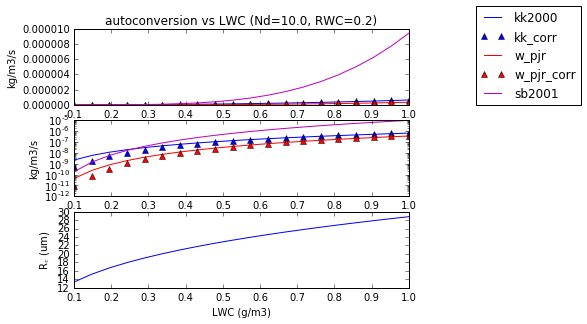

In [4]:
rhoair = 1.22 # kg/m3
# using the units found in wood 2005 
LWC_gm3 = np.linspace(0.1, 1., 20) # g/m3
LWC_kgm3 = LWC_gm3/1000. # convert to kg/m3
LWC_mr = LWC_kgm3/rhoair
Nd_cm3 = 10. # per cm3
Nd_m3 = Nd_cm3 * 1.e6 # per m3
rv = (LWC_gm3*1.e-3/(Nd_m3*4./3.*np.pi*1000.))**(1./3.)*1.e6
#print "rv", rv
a = 2.8
b = -1.42
K = 1.6e13
autowbe   = K*(LWC_kgm3**a)*(Nd_m3**b)*rhoair**(1-a)
K_kkunits = K*(1.e6)**b
autowbe_kk = K_kkunits*(LWC_mr**a)*(Nd_cm3**b)*rhoair
print "Kbe in Wood and KK units", K, K_kkunits
print autowbe[0], autowbe_kk[0]
print "diff in calculation", (autowbe_kk-autowbe)/autowbe
#print "w best estimate", autowbe
a = 2.67
b = -0.92
K = 9.06e-7
autow_uk = K*(LWC_gm3**a)*(Nd_cm3**b)
#print "w_uk", autow_uk
a = 3.19
b = -1.42
K = 2.66e-5
autow_vocals = K*(LWC_gm3**a)*(Nd_cm3**b)
#print "w_vocals", autow_vocals
a = 2.47
b = -1.79
K = 7.42e13
autokk_w = K*(LWC_kgm3**a)*(Nd_m3**b)*rhoair**(1-a)
#print "kk_w", autokk_w
autokk = 1350*(LWC_mr**a)*(Nd_cm3**b)*rhoair
#print "kk", autokk
# Seifert and Beheng
kc = 9.44e9 # cm3/g2
xstar = 2.6e-7 # g
nu = 0.
RWC_gcm3 = 0.
RWC_gcm3 = 0.2e-6
LWC_gcm3 = LWC_gm3*1.e-6
tau = 1.-(LWC_gcm3/(LWC_gcm3+RWC_gcm3))
xbar = LWC_gcm3/Nd_cm3
phi_au =600.*tau**0.68*(1-tau**0.68)**3
#print "tau,, phi_au", tau, phi_au
coef = kc/20./xstar*(nu+2)*(nu+4)/((nu+1)**2)
corr = (1.+phi_au/(1.-tau**2))
#print "coef, corr, tau", coef, corr, tau
sb_au = coef*LWC_gcm3**2*xbar**2*corr # probably in g/cm3/s
sb_au = sb_au/1000.*1.e6 # convert to kg/m3/s
#print "sf_au", sf_au
a = 3.19 # from wood vocals email
b = -1.42 # from wood vocals email
K = 1.6e13 # from wood best estimate
autopjr   = K*(LWC_kgm3**a)*(Nd_m3**b)*rhoair**(1-a)
autopjr = autopjr*corr/60.
#
#print "w pjr", autowbe
plt.figure(1)
plt.subplot(311)
plt.plot(LWC_gm3, autokk,label="kk2000")
plt.plot(LWC_gm3, autokk*corr/60.,'b^',label="kk_corr")
#plt.plot(LWC_gm3, autowbe,'r-')
#plt.plot(LWC_gm3, autow_uk,'g-',label='w_UK')
#plt.plot(LWC_gm3, autow_vocals,'g^',label="w_Vocals")
plt.plot(LWC_gm3, autopjr,'r',label="w_pjr")
plt.plot(LWC_gm3, autopjr*corr/60,'r^',label="w_pjr_corr")
plt.plot(LWC_gm3, sb_au,'m-',label="sb2001")
plt.title('autoconversion vs LWC (Nd='+str(Nd_cm3)+', RWC='+str(RWC_gcm3*1.e6)+')');
plt.ylabel('kg/m3/s')
plt.legend(loc=(1.2,4.e-8))
plt.subplot(312)
plt.semilogy(LWC_gm3, autokk)
plt.semilogy(LWC_gm3, autokk*corr/60.,'b^',label="kk_corr")
#plt.semilogy(LWC_gm3, autowbe,'r-')
#plt.semilogy(LWC_gm3, autow_uk,'g-')
#plt.semilogy(LWC_gm3, autow_vocals,'g^')
plt.semilogy(LWC_gm3, autopjr,'r')
plt.semilogy(LWC_gm3, autopjr*corr/60,'r^',label="w_pjr_corr")
plt.semilogy(LWC_gm3, sb_au,'m-')
plt.ylabel('kg/m3/s')
##print "w1", autow1 
#print "w2", autow2
plt.subplot(313)
plt.plot(LWC_gm3, rv)
plt.ylabel('R$_v$ (um)')
plt.xlabel('LWC (g/m3)')
plt.subplots_adjust(bottom=0.)
plt.show()

1.0000943579


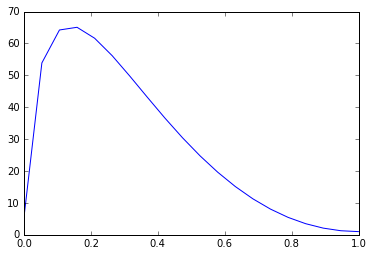

In [22]:
tau = np.linspace(0.001, 0.999, 20) # g/m3
phi_au =600.*tau**0.68*(1-tau**0.68)**3
corr = (1.+phi_au/(1.-tau**2))
print min(corr)
plt.plot(tau, corr)
plt.show()

In [90]:
rhoair = 1.22 # kg/m3
a = 3.19 # from wood vocals email
b = -1.42 # from wood vocals email
K = 1.6e13 # from wood best estimate
#convert from LWC1 in kg/m3 to LWC2 in g/m3 
#             N1 in #/m3 to N2 in #/cm3
#             auto1 in kg/m3/s to kg/kg/s
#auto1 = K*(LWC1**a)*(N1**b)  # auto1 in units of kg/m3/s
#auto1 = K*((LWC2*1.e-3)**a)*((N2*1.e6)**b
#      = K*(1.e-3**a)*(LWC2**a)*(N2**b)*(1.e6**b)
#auto1 = auto2/rhoair
print rhoair**(1.-a)
Kfix   = K*(1.e-3**a)*(1.e+6**b)/rhoair**(1-a)
print Kfix
a = 2.47
b = -1.79
print 7.42e13*1.e6**b


0.646951867468
2.01024046959e-05
1350.21803709


In [ ]:
desired final form
# 1350. * qcic**2.47 * (ncic*1.e-6_r8*rho)**(-1.79)#


$$
\begin{align}
auto_{kkmb}(kg/kg/s) & = auto_{woods}(kg/m3) / \rho \\
 & = K_w (LWC_{kgm3})^a(N_{d,m3})^b*\rho^{(1-a)} / \rho \\
 & = K_w (LWC_{kgm3}/\rho)^a(N_{d,m3})^b*\rho^{(1)} / \rho \\
 & = K_w (LWC_{kgm3}/\rho)^a(N_{d,m3})^b \\
 & = K_w (LWC_{kgm3}/\rho)^a(N_{d,m3}(\rho/\rho))^b\\
 & = K_w (LWC_{kgm3}/\rho)^a(N_{d,m3}\cdot \rho)^b(\rho)^{-b} \\
 & = K_w (LWC_{kgm3}/\rho)^a(N_{d,cm3}(10^{-6})\rho)^b(\rho)^{-b} \\
\end{align}
$$

In [ ]:
desired final form

